In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [3]:
missing_data = data.isnull()
missing_data.head(5)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Date Submitted
False    736
Name: Date Submitted, dtype: int64

Workout Date
False    736
Name: Workout Date, dtype: int64

Activity Type
False    736
Name: Activity Type, dtype: int64

Calories Burned (kCal)
False    736
Name: Calories Burned (kCal), dtype: int64

Distance (mi)
False    736
Name: Distance (mi), dtype: int64

Workout Time (seconds)
False    736
Name: Workout Time (seconds), dtype: int64

Avg Pace (min/mi)
False    736
Name: Avg Pace (min/mi), dtype: int64

Max Pace (min/mi)
False    736
Name: Max Pace (min/mi), dtype: int64

Avg Speed (mi/h)
False    736
Name: Avg Speed (mi/h), dtype: int64

Max Speed (mi/h)
False    736
Name: Max Speed (mi/h), dtype: int64

Avg Heart Rate
False    493
True     243
Name: Avg Heart Rate, dtype: int64

Steps
False    713
True      23
Name: Steps, dtype: int64

Notes
False    736
Name: Notes, dtype: int64

Source
False    736
Name: Source, dtype: int64

Link
False    736
Name: Link, dtype: int64



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          736 non-null    object 
 1   Workout Date            736 non-null    object 
 2   Activity Type           736 non-null    object 
 3   Calories Burned (kCal)  736 non-null    int64  
 4   Distance (mi)           736 non-null    float64
 5   Workout Time (seconds)  736 non-null    int64  
 6   Avg Pace (min/mi)       736 non-null    float64
 7   Max Pace (min/mi)       736 non-null    float64
 8   Avg Speed (mi/h)        736 non-null    float64
 9   Max Speed (mi/h)        736 non-null    float64
 10  Avg Heart Rate          493 non-null    float64
 11  Steps                   713 non-null    float64
 12  Notes                   736 non-null    object 
 13  Source                  736 non-null    object 
 14  Link                    736 non-null    ob

In [6]:
print("Top 5 rows of the data")
data.head()

Top 5 rows of the data


,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"Sept. 25, 2022","Sept. 25, 2022",Run,1261,9.01954,5803,10.72040,0.824435,5.59678,72.77710,159.0,15198.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6868961083
1,"Sept. 24, 2022","Sept. 24, 2022",Run,618,4.65019,2799,10.02910,1.165360,5.98258,51.48630,162.0,7380.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6866873968
2,"Sept. 23, 2022","Sept. 23, 2022",Run,412,3.10000,1775,9.54301,0.000000,6.28732,0.00000,NaN,4721.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6864982399
3,"Sept. 18, 2022","Sept. 18, 2022",Indoor Run / Jog,413,3.10000,1779,9.56452,10.572900,6.27319,5.67488,138.0,4212.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6854315680
4,"Sept. 17, 2022","Sept. 17, 2022",Run,415,3.10691,1892,10.14470,0.446515,5.91440,134.37400,159.0,4970.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6852309619


In [7]:
data.shape

(736, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          736 non-null    object 
 1   Workout Date            736 non-null    object 
 2   Activity Type           736 non-null    object 
 3   Calories Burned (kCal)  736 non-null    int64  
 4   Distance (mi)           736 non-null    float64
 5   Workout Time (seconds)  736 non-null    int64  
 6   Avg Pace (min/mi)       736 non-null    float64
 7   Max Pace (min/mi)       736 non-null    float64
 8   Avg Speed (mi/h)        736 non-null    float64
 9   Max Speed (mi/h)        736 non-null    float64
 10  Avg Heart Rate          493 non-null    float64
 11  Steps                   713 non-null    float64
 12  Notes                   736 non-null    object 
 13  Source                  736 non-null    object 
 14  Link                    736 non-null    ob

In [9]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [11]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"Sept. 25, 2022","Sept. 25, 2022",Run,1261,9.01954,5803,10.72040,0.824435,5.59678,72.77710,159.0,15198.0,549
1,"Sept. 24, 2022","Sept. 24, 2022",Run,618,4.65019,2799,10.02910,1.165360,5.98258,51.48630,162.0,7380.0,462
2,"Sept. 23, 2022","Sept. 23, 2022",Run,412,3.10000,1775,9.54301,0.000000,6.28732,0.00000,NaN,4721.0,276
3,"Sept. 18, 2022","Sept. 18, 2022",Indoor Run / Jog,413,3.10000,1779,9.56452,10.572900,6.27319,5.67488,138.0,4212.0,276
4,"Sept. 17, 2022","Sept. 17, 2022",Run,415,3.10691,1892,10.14470,0.446515,5.91440,134.37400,159.0,4970.0,315


In [12]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            243
Steps                      23
target                      0
dtype: int64

In [13]:
data.drop('Date Submitted', axis=1, inplace=True)

In [14]:
data2 = data[data['Workout Time (seconds)'].values < 30000]


data3 = data2[data2['Workout Time (seconds)'].values > 0]

data4 = data3[data3['Activity Type'] == 'Run']

data5 = data4[data4['Max Pace (min/mi)'].values < 15]

In [15]:
data5.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,367.000000,578.000000,578.000000
mean,459.237024,3.624963,2185.378893,9.944221,1.208839,6.181073,51.828619,123.040872,5638.844291,316.439446
std,253.951457,1.936907,1332.120588,2.157229,1.892628,0.784899,143.789862,56.491703,3252.317043,133.297912
min,19.000000,0.178743,106.000000,7.774190,0.000000,1.377360,0.000000,0.000000,281.000000,2.000000
25%,348.000000,3.010000,1577.250000,9.005802,0.000000,5.944205,0.000000,127.000000,4197.750000,249.000000
50%,410.000000,3.101415,1806.500000,9.586255,0.800227,6.258960,23.067450,149.000000,4812.000000,286.500000
75%,486.750000,4.013120,2365.000000,10.093900,1.147520,6.662373,62.308150,156.000000,6248.750000,418.750000
max,1928.000000,13.481600,11065.000000,43.561600,9.022240,7.717840,1853.550000,169.000000,23604.000000,562.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

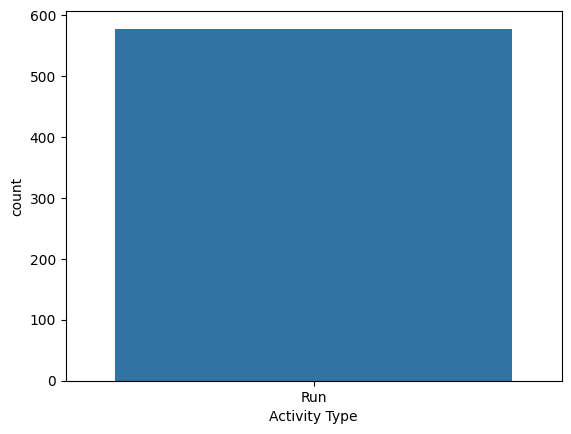

In [17]:
sns.countplot(x='Activity Type', data=data5)

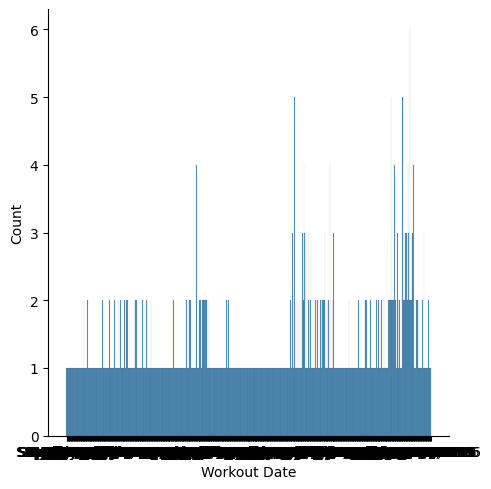

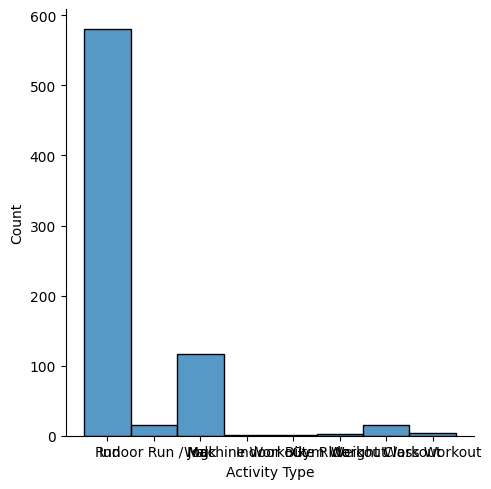

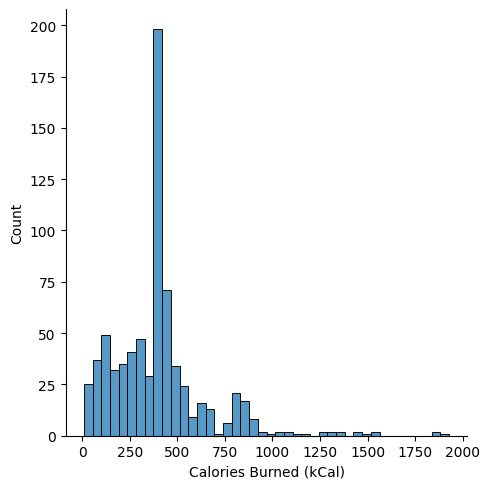

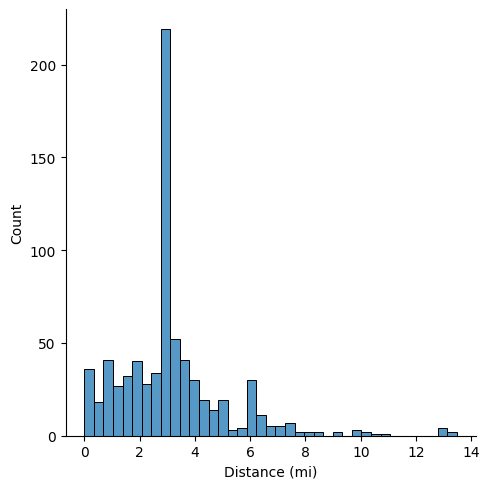

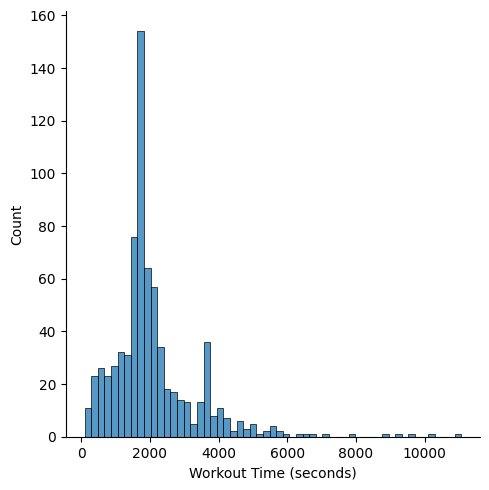

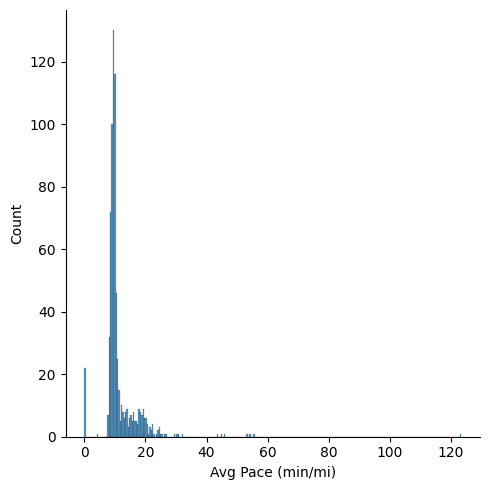

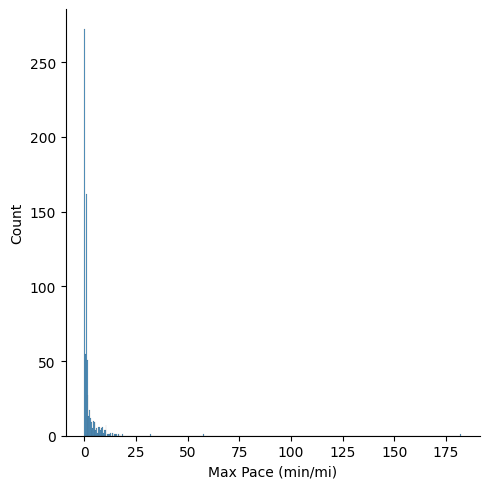

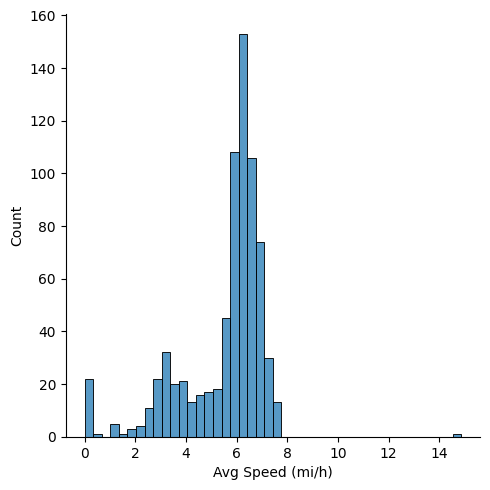

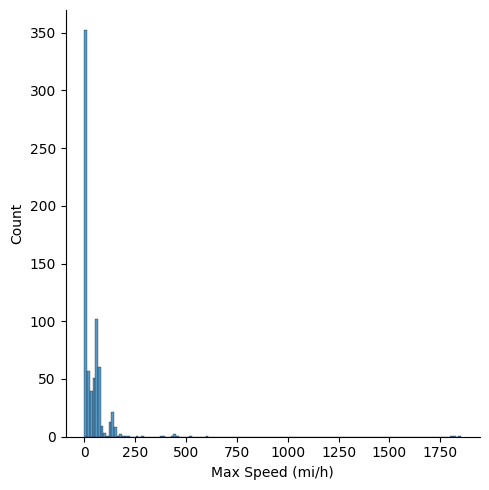

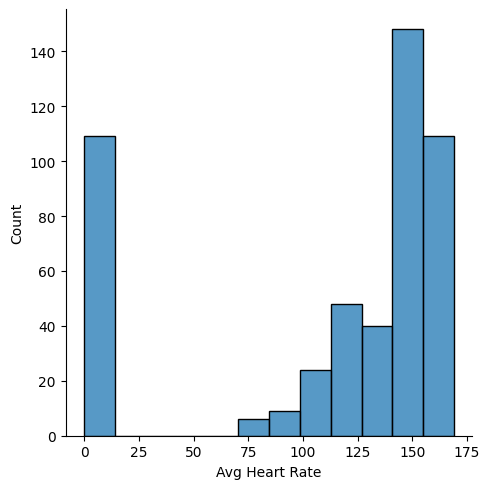

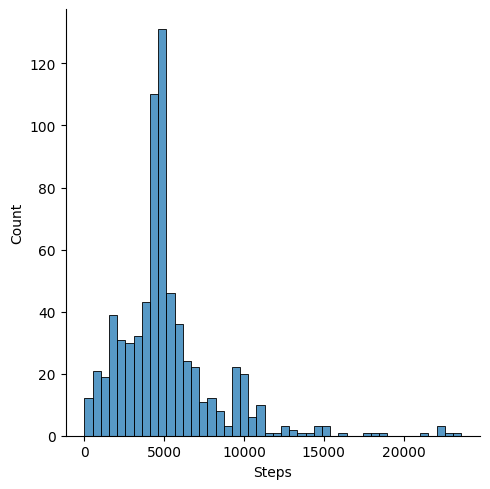

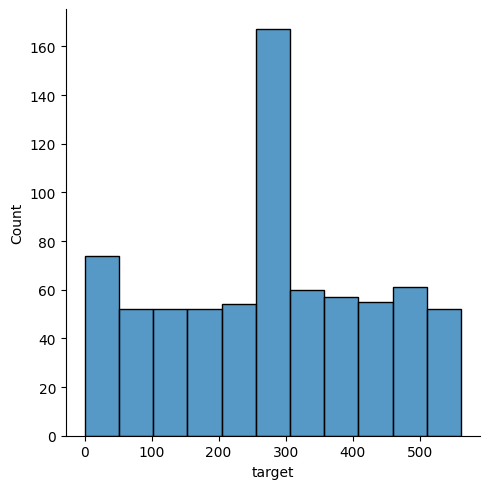

In [18]:
for column in data5:
    sns.displot(x=column, data=data)

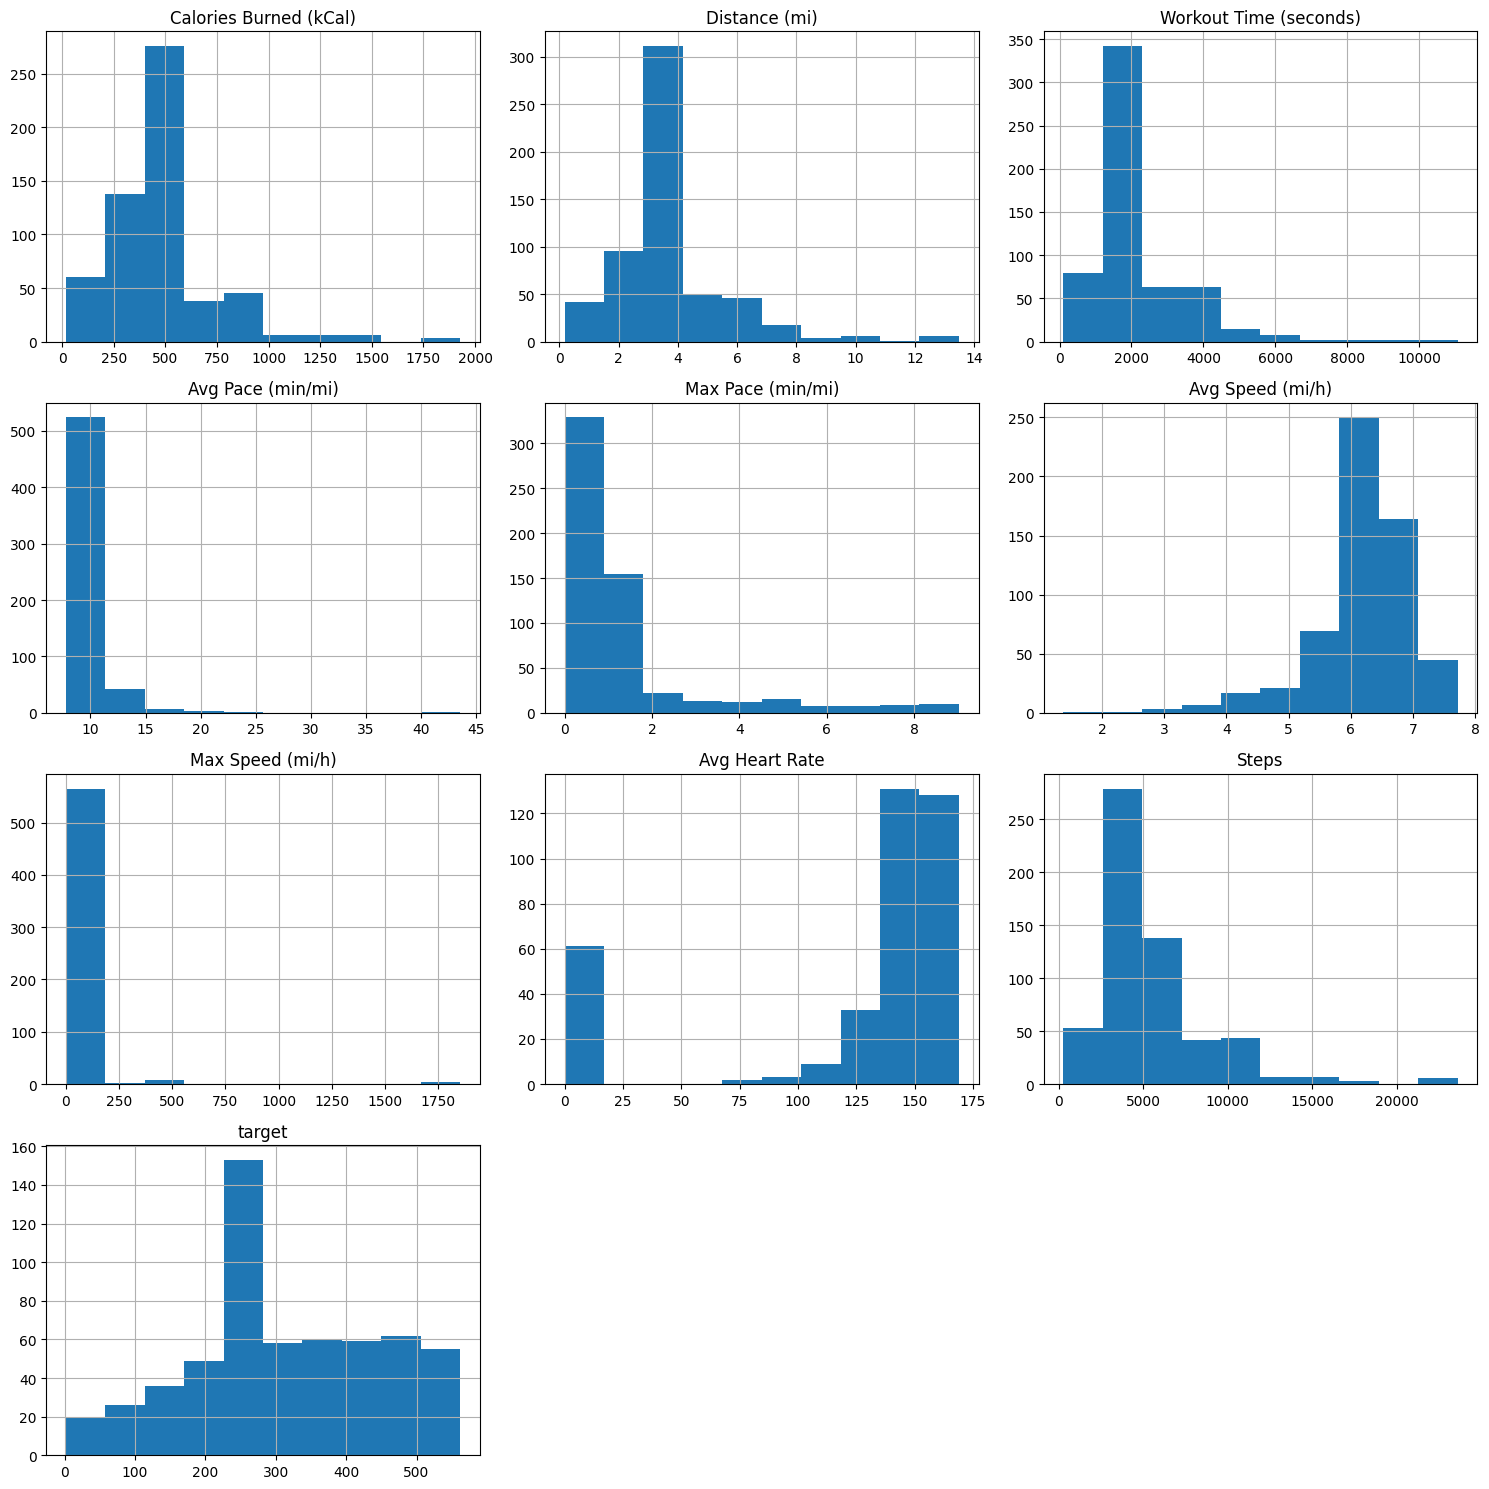

In [19]:
data5.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

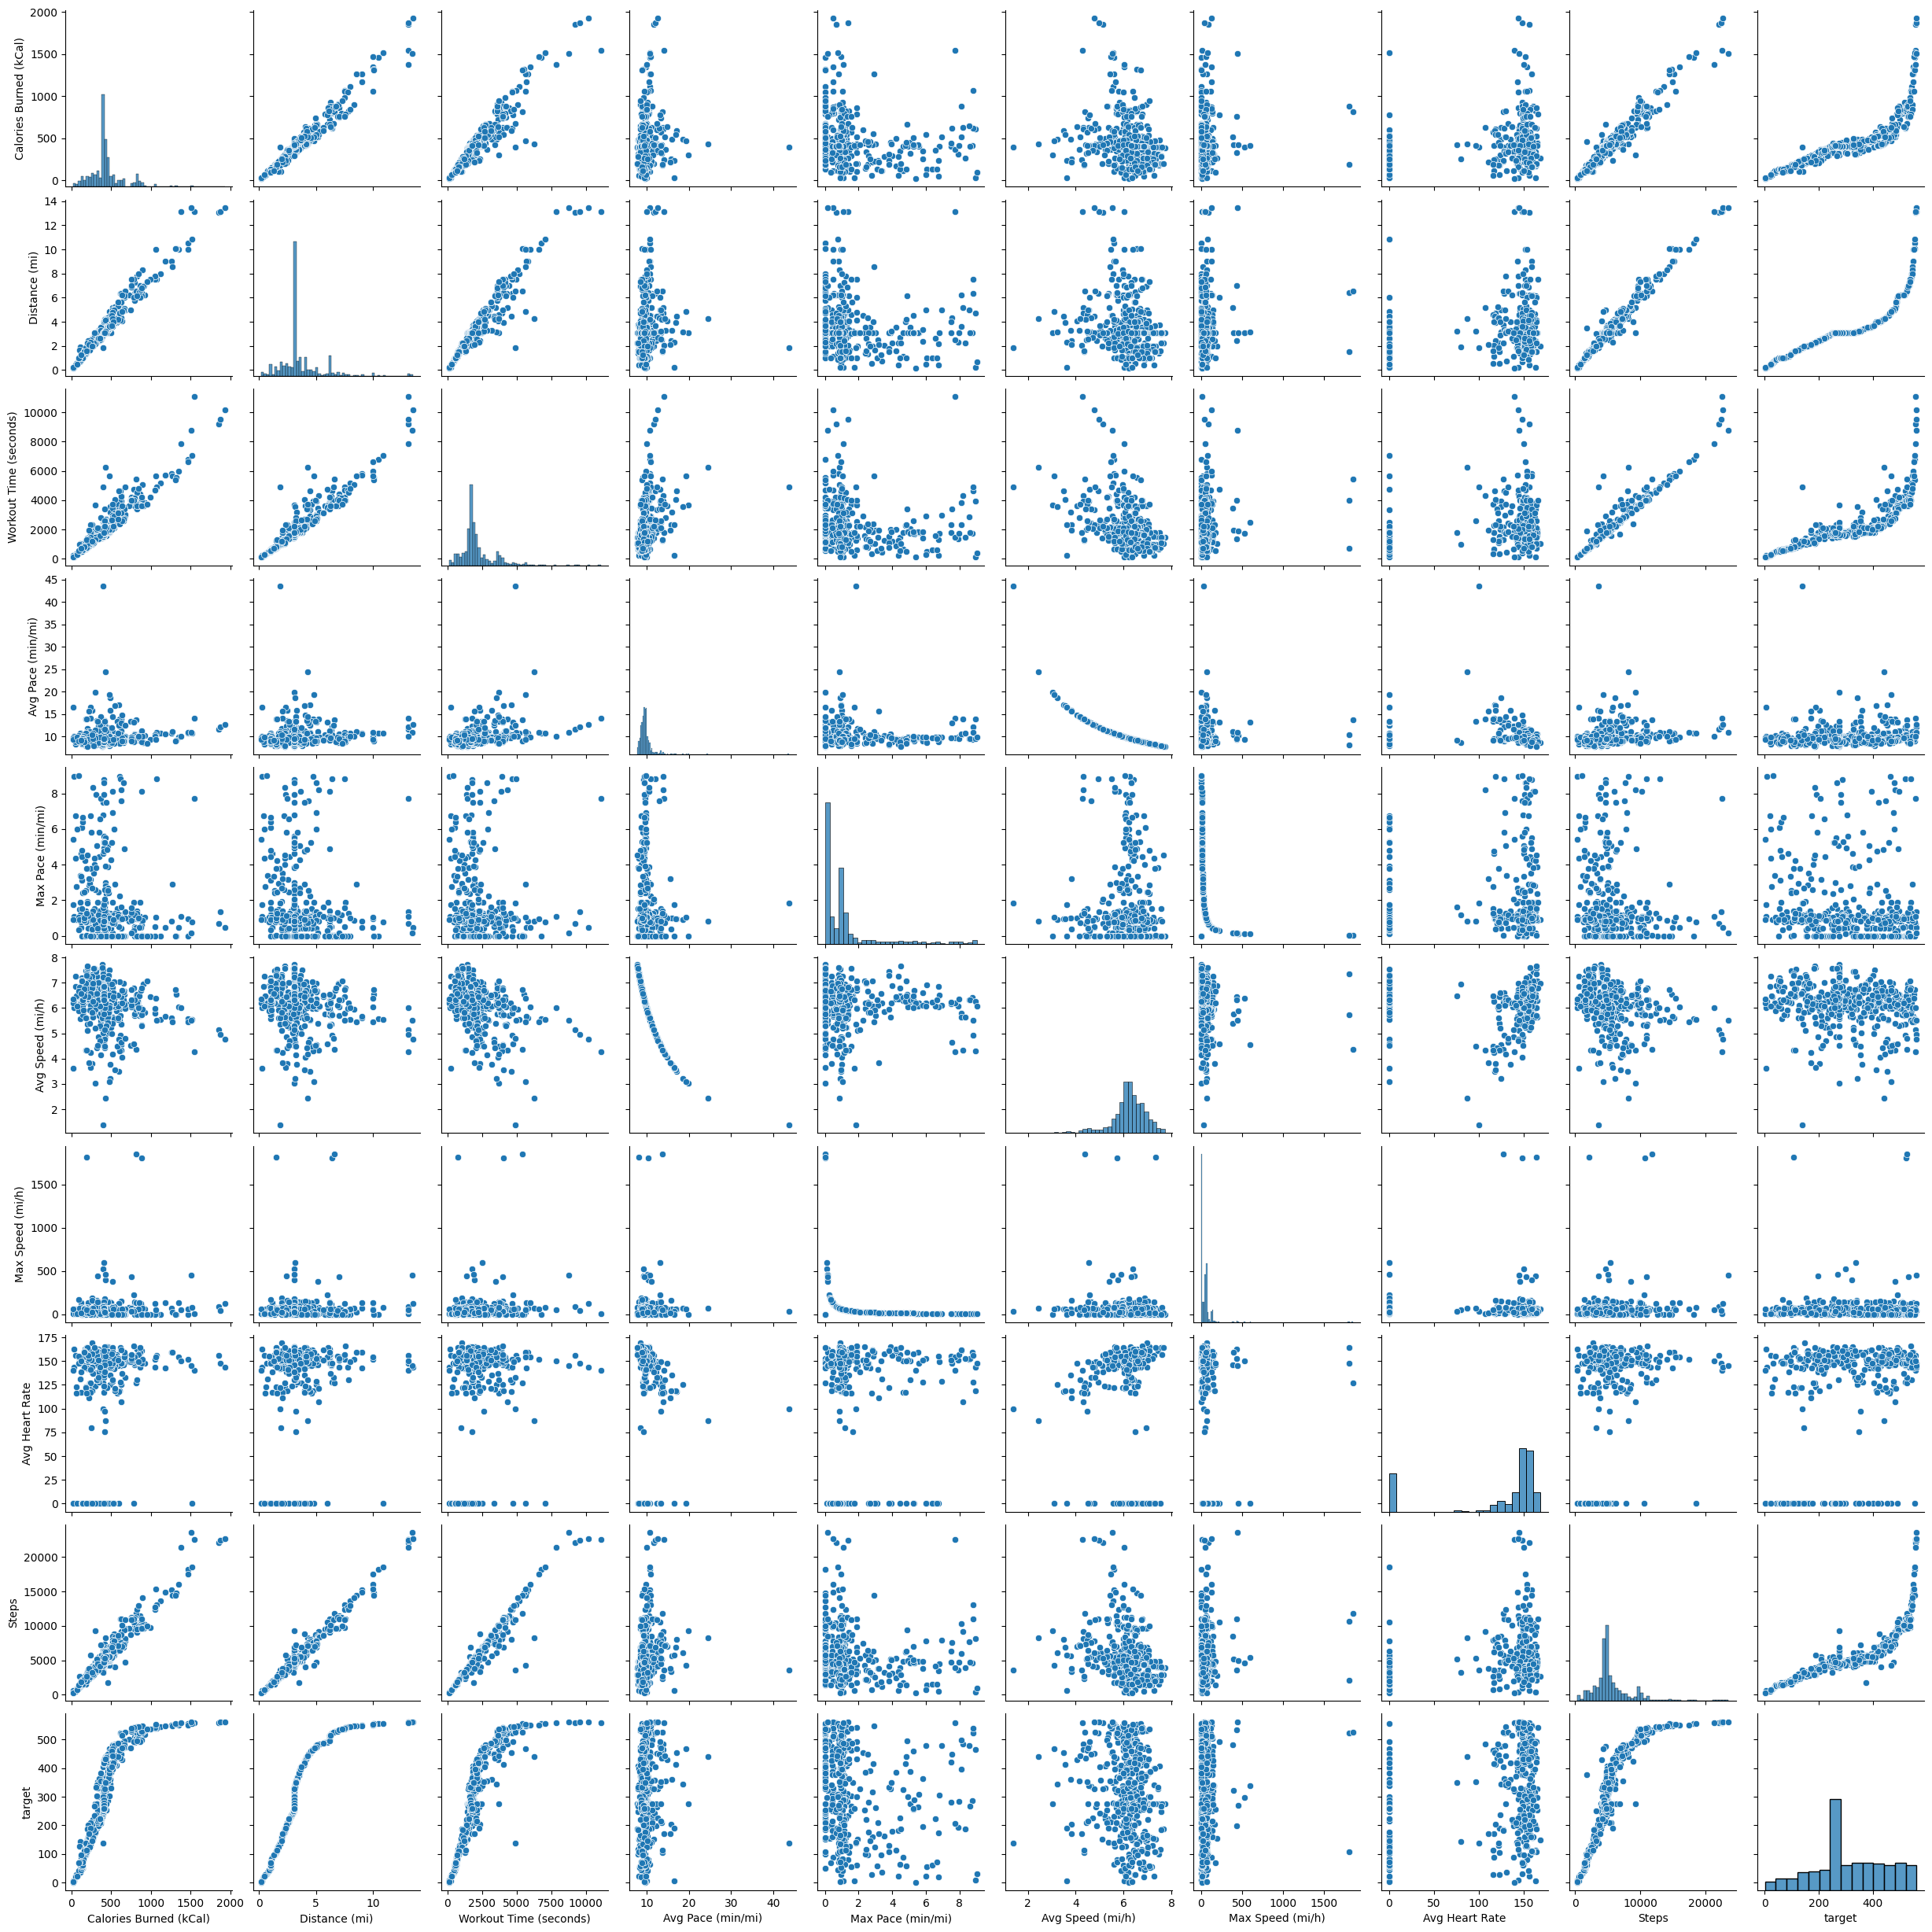

In [20]:
sns.pairplot(data5)

KeyError: "None of [Index(['Workout Date'], dtype='object')] are in the [columns]"

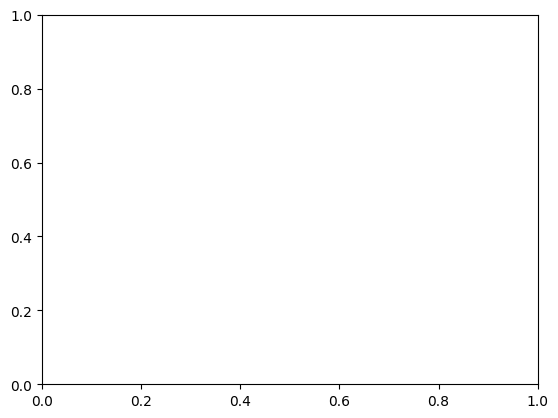

In [21]:
for column in data5:
    plt.figure()
    data.boxplot([column])

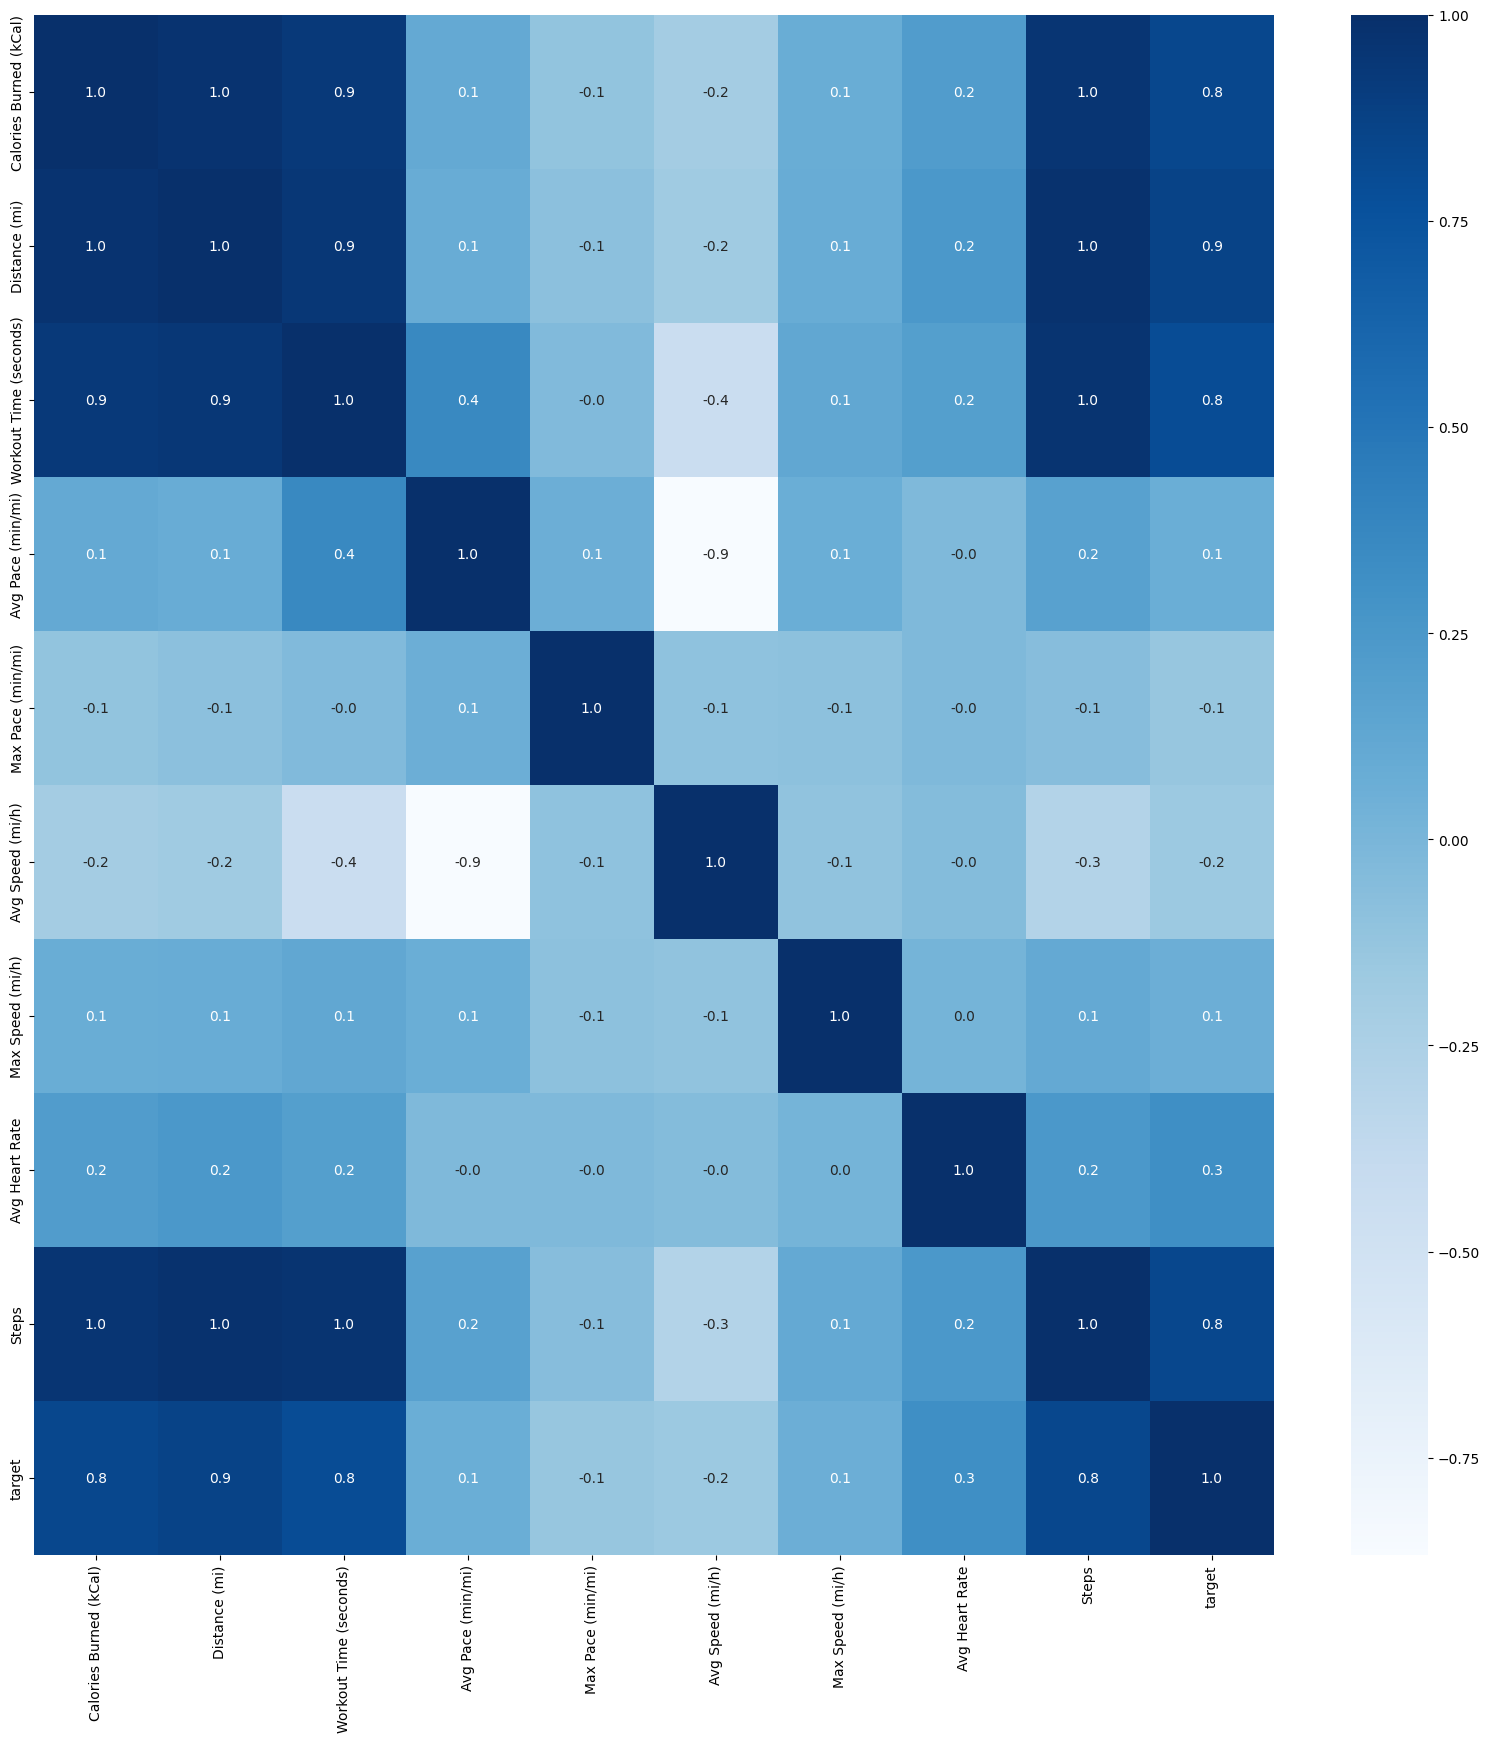

In [22]:
correlation_matrix = data5.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

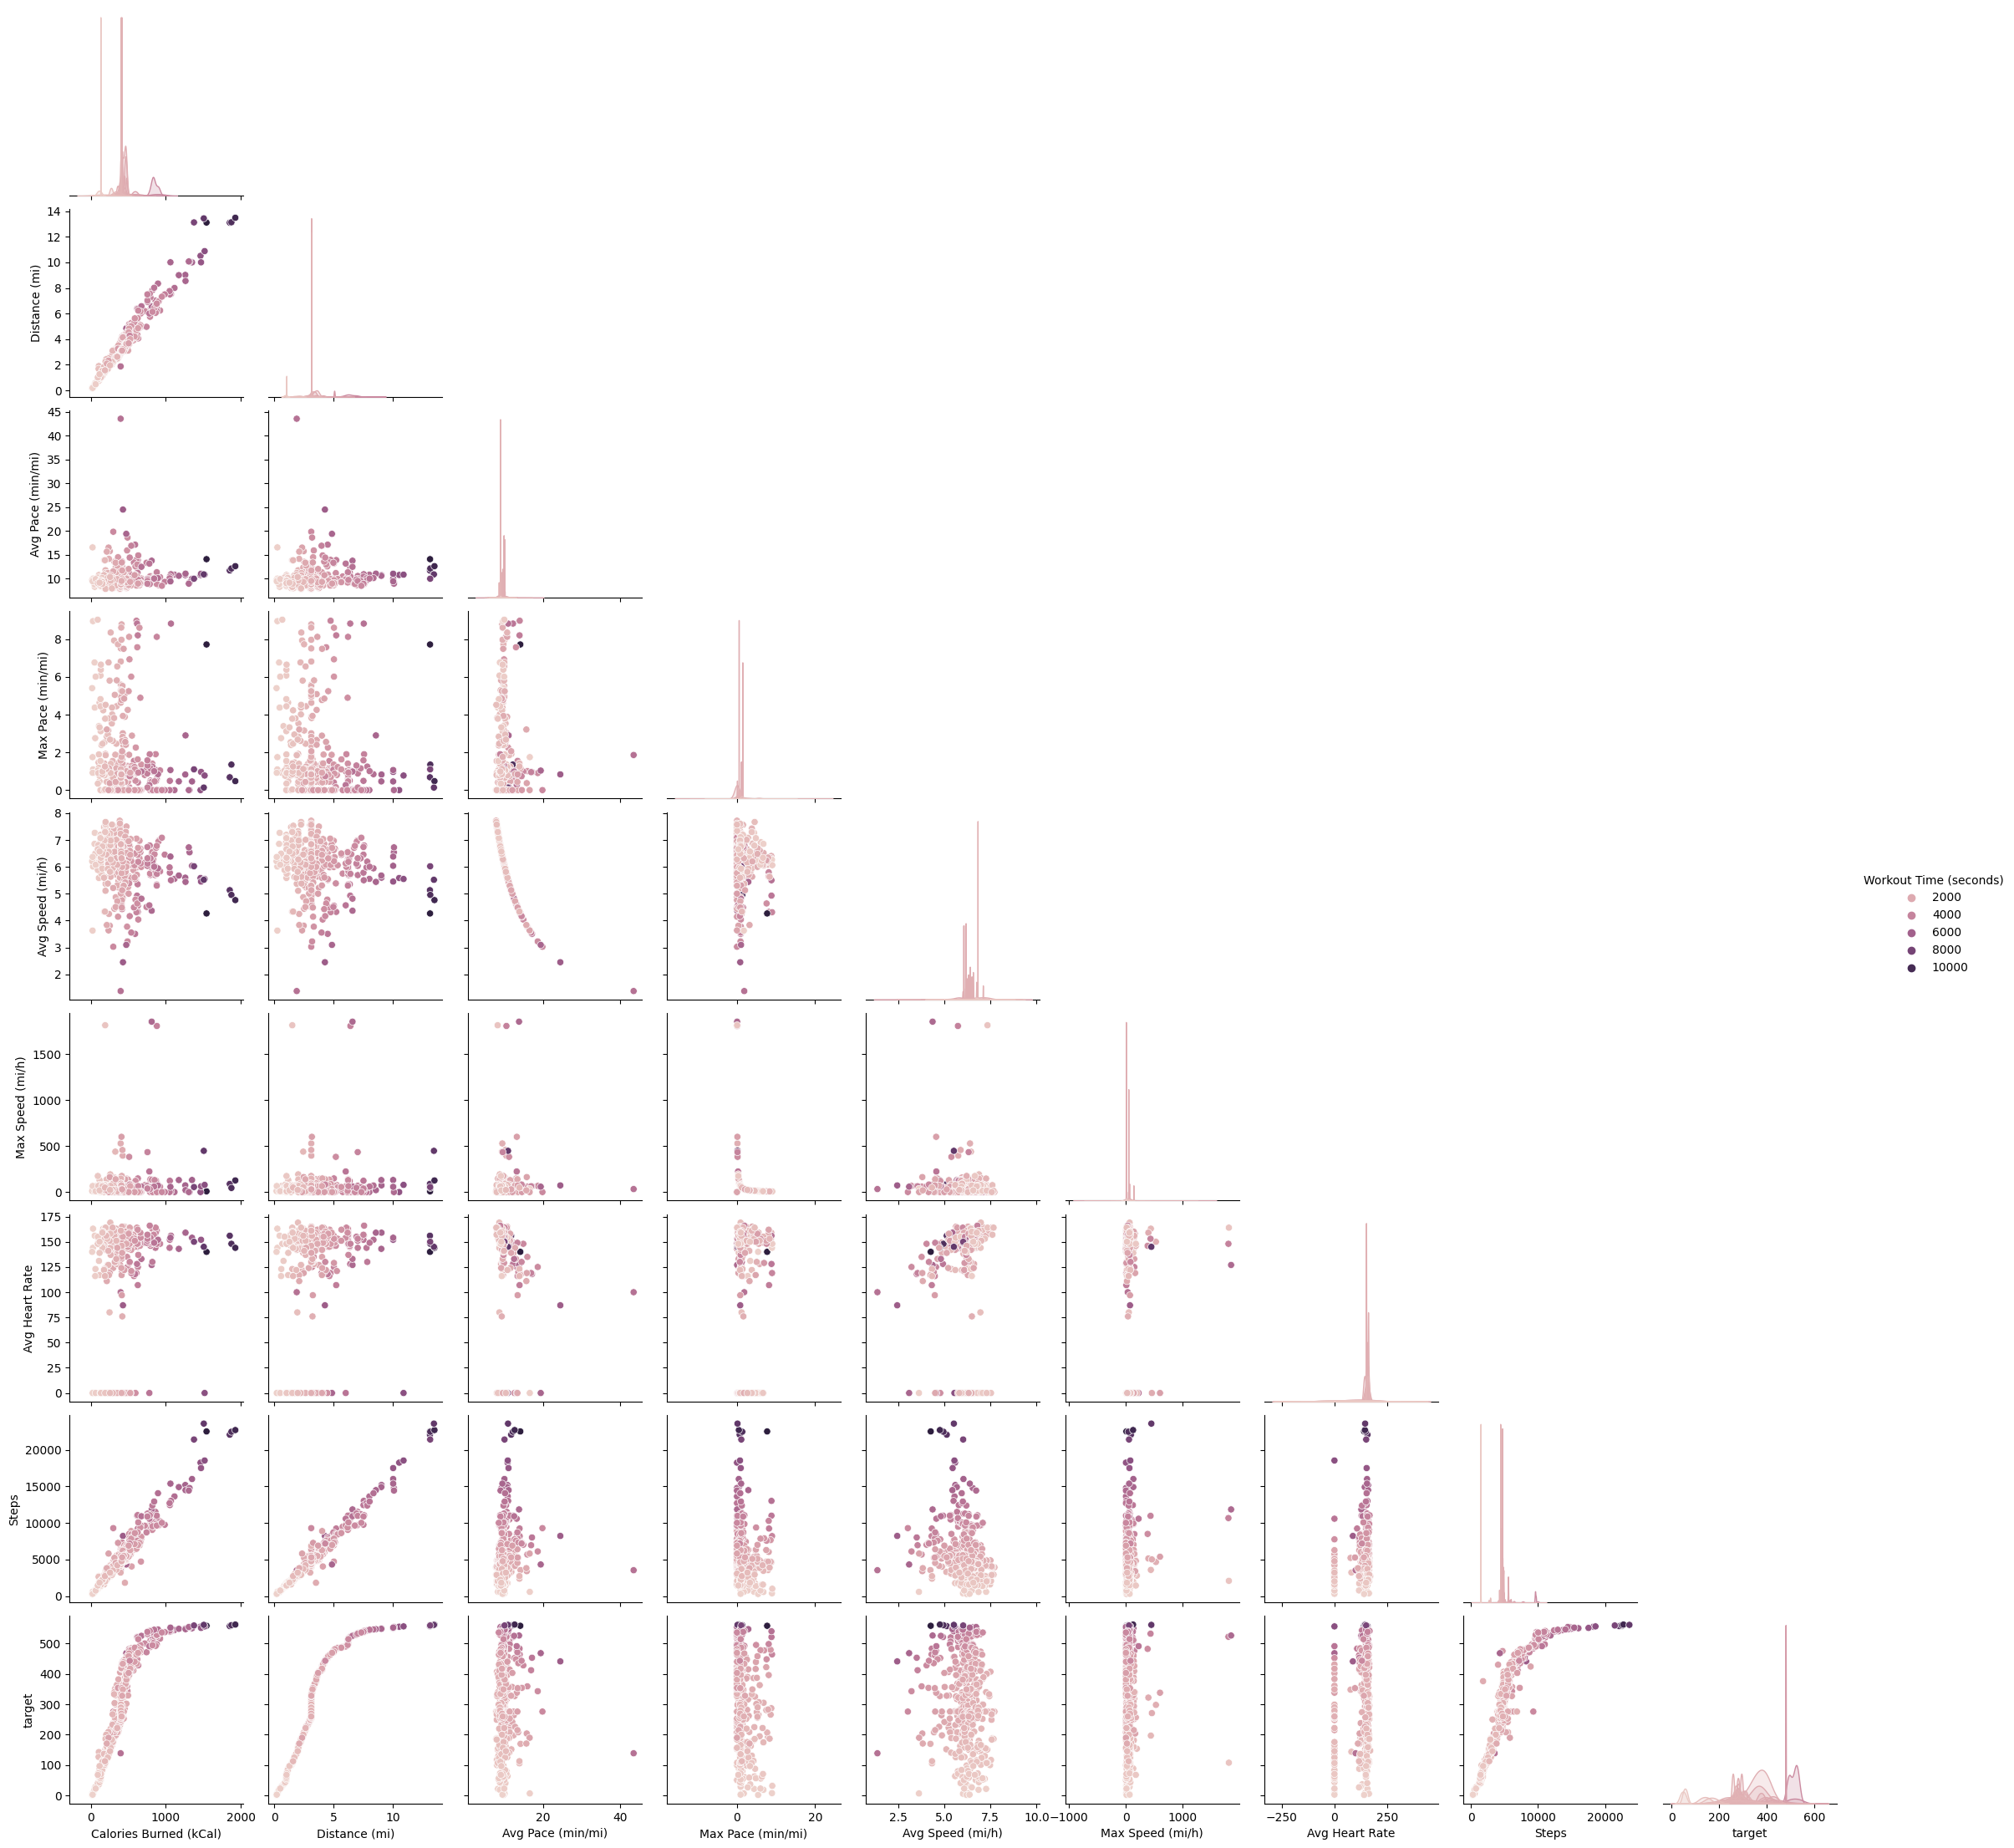

In [23]:
sns.pairplot(data5, corner=True, hue = 'Workout Time (seconds)')